In [1]:
data <- read.csv("new_chr3_static_classified.csv")
head(data,10)
# tail(data,10)
# head(read.csv("new_chr19_static_classified.csv"))

X,binID,start,cata,aRead,bRead,aNorm,bNorm
155914,chr3_3001300,3001200,3,79,92,50.318471,42.201835
69851,chr3_3001300,3001200,2,68,101,43.312102,46.330275
1,chr3_3001300,3001200,1,10,25,6.369427,11.467890
155915,chr3_3001500,3001400,3,176,258,86.274510,80.877743
69852,chr3_3001500,3001400,2,21,51,10.294118,15.987461
2,chr3_3001500,3001400,1,7,10,3.431373,3.134796
155916,chr3_3002600,3002500,3,102,125,58.285714,58.139535
69853,chr3_3002600,3002500,2,68,83,38.857143,38.604651
3,chr3_3002600,3002500,1,5,7,2.857143,3.255814
155917,chr3_3003100,3003000,3,96,119,54.237288,43.589744


In [2]:
high_sub <- data[data$cata == 3, c("binID", "start", "bRead")]
names(high_sub) <- c("binID", "start", "high")
# head(high_sub)
medium_sub <- data[data$cata == 2, c("binID", "start", "bRead")]
names(medium_sub) <- c("binID", "start", "medium")
# head(medium_sub)
low_sub <- data[data$cata == 1, c("binID", "start", "bRead")]
names(low_sub) <- c("binID", "start", "low")
# head(low_sub)

# merge
clusterdf <- merge(high_sub, medium_sub, all = TRUE)
clusterdf <- merge(clusterdf, low_sub, all = TRUE)
clusterdf <- clusterdf[order(as.numeric(clusterdf$start)),]
clusterdf[is.na(clusterdf)] <- 0
head(clusterdf,10)

,binID,start,high,medium,low
47941,chr3_3001300,3001200,92,101,25
47942,chr3_3001500,3001400,258,51,10
47951,chr3_3002600,3002500,125,83,7
47952,chr3_3003100,3003000,119,141,13
47980,chr3_3007000,3006900,250,102,28
47982,chr3_3007200,3007100,335,56,23
47991,chr3_3008400,3008300,275,99,18
48023,chr3_3013100,3013000,58,25,0
48029,chr3_3014100,3014000,371,82,28
48037,chr3_3014900,3014800,169,63,10


In [3]:
paste("Total number of Bins:", nrow(clusterdf))

[1] "Total number of Bins: 92211"

In [4]:
# write.csv(clusterdf, "A_clusterdf_count.csv")

In [5]:
dist_tolerance <- 100
# meth_tolerance <- 40 
# cor_2_cutoff <- 0.9
alpha <- 0.05

In [6]:
pre.row <- clusterdf[1,]

dist.fun <- function(row) {
    dist <- as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"]))
    pre.row <<- row
    return(c(row["binID"], row["start"], row["high"], row["medium"], row["low"], dist = dist)) 
}

dist.result <- t(apply(clusterdf, 1, dist.fun))
dist.result <- as.data.frame(dist.result)
head(dist.result, 30)

,binID,start,high,medium,low,dist
47941,chr3_3001300,3001200,92,101,25,0
47942,chr3_3001500,3001400,258,51,10,200
47951,chr3_3002600,3002500,125,83,7,1100
47952,chr3_3003100,3003000,119,141,13,500
47980,chr3_3007000,3006900,250,102,28,3900
47982,chr3_3007200,3007100,335,56,23,200
47991,chr3_3008400,3008300,275,99,18,1200
48023,chr3_3013100,3013000,58,25,0,4700
48029,chr3_3014100,3014000,371,82,28,1000
48037,chr3_3014900,3014800,169,63,10,800


In [7]:
dist.result <- dist.result[as.numeric(as.character(dist.result$dist)) <= dist_tolerance, ]
head(dist.result)

dist.result <- dist.result[-1,]
head(dist.result)
nrow(dist.result)

,binID,start,high,medium,low,dist
47941,chr3_3001300,3001200,92,101,25,0
48063,chr3_3018400,3018300,27,0,0,100
48064,chr3_3018500,3018400,68,27,0,100
48077,chr3_3020600,3020500,60,78,19,100
48079,chr3_3020700,3020600,158,10,3,100
48080,chr3_3020800,3020700,120,0,0,100


,binID,start,high,medium,low,dist
48063,chr3_3018400,3018300,27,0,0,100
48064,chr3_3018500,3018400,68,27,0,100
48077,chr3_3020600,3020500,60,78,19,100
48079,chr3_3020700,3020600,158,10,3,100
48080,chr3_3020800,3020700,120,0,0,100
48436,chr3_3063300,3063200,222,92,24,100


[1] 12186

In [8]:
start.pos <- dist.result$start
complete <- lapply(start.pos, function(x) c(as.numeric(as.character(x))-100, as.numeric(as.character(x))))
complete <- Reduce(c, complete)
complete <- unique(complete)
complete

[1]   3018200   3018300   3018400   3020400   3020500   3020600   3020700
    [8]   3063100   3063200   3065000   3065100   3065200   3070400   3070500
   [15]   3089900   3090000   3104500   3104600   3109200   3109300   3109400
   [22]   3116900   3117000   3167600   3167700   3169800   3169900   3177100
   [29]   3177200   3177300   3194400   3194500   3201200   3201300   3246800
   [36]   3246900   3247000   3255300   3255400   3255500   3256200   3256300
   [43]   3256800   3256900   3257700   3257800   3257900   3258200   3258300
   [50]   3259100   3259200   3259300   3259400   3259500   3259700   3259800
   [57]   3261000   3261100   3262900   3263000   3263100   3263200   3263300
   [64]   3294600   3294700   3295400   3295500   3295600   3296800   3296900
   [71]   3297500   3297600   3297700   3297800   3306300   3306400   3308500
   [78]   3308600   3327400   3327500   3328400   3328500   3331400   3331500
   [85]   3336100   3336200   3339000   3339100   3343200   3343300   3345300
   [92]   3345400   3346600   3346700   3347900   3348000   3392400   3392500
   [99]   3399900   3400000   3417200   3417300   3421800   3421900   3425400
  [106]   3425500   3425900   3426000   3426100   3426200   3426300   3427200
  [113]   3427300   3428300   3428400   3429700   3429800   3429900   3430600
  [120]   3430700   3449800   3449900   3459900   3460000   3464800   3464900
  [127]   3473000   3473100   3474200   3474300   3539500   3539600   3547400
  [134]   3547500   3547800   3547900   3549100   3549200   3672700   3672800
  [141]   3692100   3692200   3692800   3692900   3694200   3694300   3694400
  [148]   3791200   3791300   3814700   3814800   3826200   3826300   3831600
  [155]   3831700   3865500   3865600   3867500   3867600   3879100   3879200
  [162]   3882600   3882700   3882800   3900700   3900800   3910700   3910800
  [169]   3910900   3911000   3911100   3911900   3912000   3912700   3912800
  [176]   3912900   3913000   3935200   3935300   3962600   3962700   4005300
  [183]   4005400   4062900   4063000   4063600   4063700   4065200   4065300
  [190]   4067100   4067200   4081300   4081400   4089200   4089300   4140800
  [197]   4140900   4141000   4156400   4156500   4156700   4156800   4157000
  [204]   4157100   4157900   4158000   4161700   4161800   4161900   4170700
  [211]   4170800   4184700   4184800   4184900   4185000   4260300   4260400
  [218]   4260800   4260900   4278000   4278100   4280700   4280800   4288600
  [225]   4288700   4291000   4291100   4309900   4310000   4310400   4310500
  [232]   4311500   4311600   4311700   4311800   4387800   4387900   4388000
  [239]   4388200   4388300   4388800   4388900   4389000   4389100   4390700
  [246]   4390800   4391600   4391700   4391800   4391900   4392000   4392100
  [253]   4392600   4392700   4554600   4554700   4584500   4584600   4585200
  [260]   4585300   4628700   4628800   4633000   4633100   4719200   4719300
  [267]   4741600   4741700   4910700   4910800   5039400   5039500   5040400
  [274]   5040500   5041600   5041700   5070200   5070300   5070900   5071000
  [281]   5081300   5081400   5081500   5082300   5082400   5162000   5162100
  [288]   5172100   5172200   5203400   5203500   5212000   5212100   5212200
  [295]   5226900   5227000   5227100   5244000   5244100   5250500   5250600
  [302]   5340100   5340200   5355800   5355900   5356000   5398800   5398900
  [309]   5401300   5401400   5403400   5403500   5422500   5422600   5453300
  [316]   5453400   5525200   5525300   5539300   5539400   5576000   5576100
  [323]   5587000   5587100   5641500   5641600   5654200   5654300   5802100
  [330]   5802200   5805200   5805300   5805400   5805500   5820500   5820600
  [337]   5827000   5827100   5949600   5949700   6011100   6011200   6054600
  [344]   6054700   6058900   6059000   6062500   6062600   6063300   6063400
  [351]   6063500   6064000   6064100   6064200   6068400   6068500   6128300
  [358]   6128400   613660

In [9]:
grouping <- clusterdf[as.numeric(as.character(clusterdf$start)) %in% complete, ]
dist.result <- as.data.frame(grouping)
head(grouping,10)

,binID,start,high,medium,low
48062,chr3_3018300,3018200,37,8,5
48063,chr3_3018400,3018300,27,0,0
48064,chr3_3018500,3018400,68,27,0
48076,chr3_3020500,3020400,125,59,11
48077,chr3_3020600,3020500,60,78,19
48079,chr3_3020700,3020600,158,10,3
48080,chr3_3020800,3020700,120,0,0
48435,chr3_3063200,3063100,20,35,33
48436,chr3_3063300,3063200,222,92,24
48451,chr3_3065100,3065000,190,16,11


In [10]:
pre.row <- dist.result[1,]

test.fun <- function(row) {
    if (as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"])) > 100) {
        pre.row <<- row
        return(c(row["binID"], start = as.character(row["start"]), p.value = "0"))
    } else {
        test.matrix <- cbind(c(as.numeric(as.character(pre.row["high"])),
                               as.numeric(as.character(pre.row["medium"])),
                               as.numeric(as.character(pre.row["low"]))),
                             c(as.numeric(as.character(row["high"])), 
                               as.numeric(as.character(row["medium"])),
                               as.numeric(as.character(row["low"]))))
        test.matrix <- test.matrix[rowSums(test.matrix) > 0, ]
        value <- suppressWarnings(chisq.test(test.matrix)$p.value)
        pre.row <<- row
        return(c(row["binID"], start = as.character(row["start"]), p.value = as.character(value)))
    }
}

test.result <- apply(dist.result[-1,], MARGIN = 1, FUN = test.fun)
test.result <- t(test.result)
test.result <- as.data.frame(test.result)
head(test.result)

,binID,start,p.value
48063,chr3_3018400,3018300,0.0146550726130565
48064,chr3_3018500,3018400,0.00402073124540772
48076,chr3_3020500,3020400,0
48077,chr3_3020600,3020500,6.85493290004851e-06
48079,chr3_3020700,3020600,3.83496902989687e-24
48080,chr3_3020800,3020700,0.00844056060194234


In [11]:
good.result <- test.result[as.numeric(as.character(test.result$p.value)) > alpha,]
head(good.result)

,binID,start,p.value
48617,chr3_3090100,3090000,0.0615755854592579
48734,chr3_3104700,3104600,0.320585944586438
49242,chr3_3177300,3177200,0.0874787648726315
49243,chr3_3177400,3177300,0.120046625524123
49333,chr3_3194600,3194500,0.113460905435695
49383,chr3_3201400,3201300,0.921581118909411


In [12]:
start.pos <- good.result$start
complete <- lapply(start.pos, function(x) c(as.numeric(as.character(x))-100, as.numeric(as.character(x))))
complete <- Reduce(c, complete)
complete <- unique(complete)
complete

[1]   3089900   3090000   3104500   3104600   3177100   3177200   3177300
   [8]   3194400   3194500   3201200   3201300   3255400   3255500   3257700
  [15]   3257800   3258200   3258300   3259100   3259200   3259300   3259400
  [22]   3259700   3259800   3261000   3261100   3263200   3263300   3296800
  [29]   3296900   3327400   3327500   3328400   3328500   3339000   3339100
  [36]   3343200   3343300   3399900   3400000   3426100   3426200   3429800
  [43]   3429900   3464800   3464900   3473000   3473100   3474200   3474300
  [50]   3549100   3549200   3692100   3692200   3694300   3694400   3831600
  [57]   3831700   3910700   3910800   3910900   3912700   3912800   4065200
  [64]   4065300   4089200   4089300   4140900   4141000   4156400   4156500
  [71]   4156700   4156800   4161700   4161800   4170700   4170800   4184700
  [78]   4184800   4184900   4185000   4309900   4310000   4310400   4310500
  [85]   4311600   4311700   4311800   4387800   4387900   4388800   4388900
  [92]   4391600   4391700   4391900   4392000   4392100   4392600   4392700
  [99]   4719200   4719300   5039400   5039500   5070900   5071000   5082300
 [106]   5082400   5162000   5162100   5226900   5227000   5244000   5244100
 [113]   5250500   5250600   5340100   5340200   5403400   5403500   5422500
 [120]   5422600   5453300   5453400   5576000   5576100   5654200   5654300
 [127]   5805200   5805300   5805400   5805500   5820500   5820600   5827000
 [134]   5827100   6062500   6062600   6064000   6064100   6064200   6137300
 [141]   6137400   6158900   6159000   6159400   6159500   6267900   6268000
 [148]   6297700   6297800   6297900   6298000   6300200   6300300   6302800
 [155]   6302900   6303000   6303700   6303800   6343400   6343500   6461900
 [162]   6462000   6478700   6478800   6535400   6535500   6571500   6571600
 [169]   6608200   6608300   6608500   6608600   6625900   6626000   6627300
 [176]   6627400   6665800   6665900   6738600   6738700   6738800   6779900
 [183]   6780000   6785000   6785100   6798700   6798800   6799400   6799500
 [190]   6837800   6837900   6838000   6850100   6850200   6900000   6900100
 [197]   6945500   6945600   6957600   6957700   6957800   7049900   7050000
 [204]   7050500   7050600   7051300   7051400   7142400   7142500   7156500
 [211]   7156600   7174500   7174600   7217800   7217900   7345200   7345300
 [218]   7424900   7425000   7480100   7480200   7508400   7508500   7590700
 [225]   7590800   7613200   7613300   7743000   7743100   7777100   7777200
 [232]   7777300   7777400   7777900   7778000   7792300   7792400   7792500
 [239]   7834700   7834800   7835000   7835100   7835200   7835400   7835500
 [246]   7923700   7923800   8028300   8028400   8087500   8087600   8175500
 [253]   8175600   8225200   8225300   8225800   8225900   8228100   8228200
 [260]   8228300   8228800   8228900   8326200   8326300   8340600   8340700
 [267]   8386000   8386100   8510500   8510600   8529900   8530000   8531100
 [274]   8531200   8576000   8576100   8576200   8656700   8656800   8656900
 [281]   8667700   8667800   8710100   8710200   8750300   8750400   8767000
 [288]   8767100   8785000   8785100   8785200   8785300   8834100   8834200
 [295]   8842100   8842200   8868600   8868700   8897900   8898000   8917800
 [302]   8917900   8924800   8924900   8948900   8949000   8953500   8953600
 [309]   9059500   9059600   9064800   9064900   9070300   9070400   9079600
 [316]   9079700   9091500   9091600   9091700   9092800   9092900   9155100
 [323]   9155200   9155300   9186000   9186100   9239600   9239700   9293300
 [330]   9293400   9296800   9296900   9320100   9320200   9328400   9328500
 [337]   9339400   9339500   9388200   9388300   9393300   9393400   9440700
 [344]   9440800   9444700   9444800   9451400   9451500   9452000   9452100
 [351]   9465900   9466000   9489400   9489500   9501600   9501700   9502400
 [358]   9502500   9666100   9666200   9679300   9679400   9679500   9679600

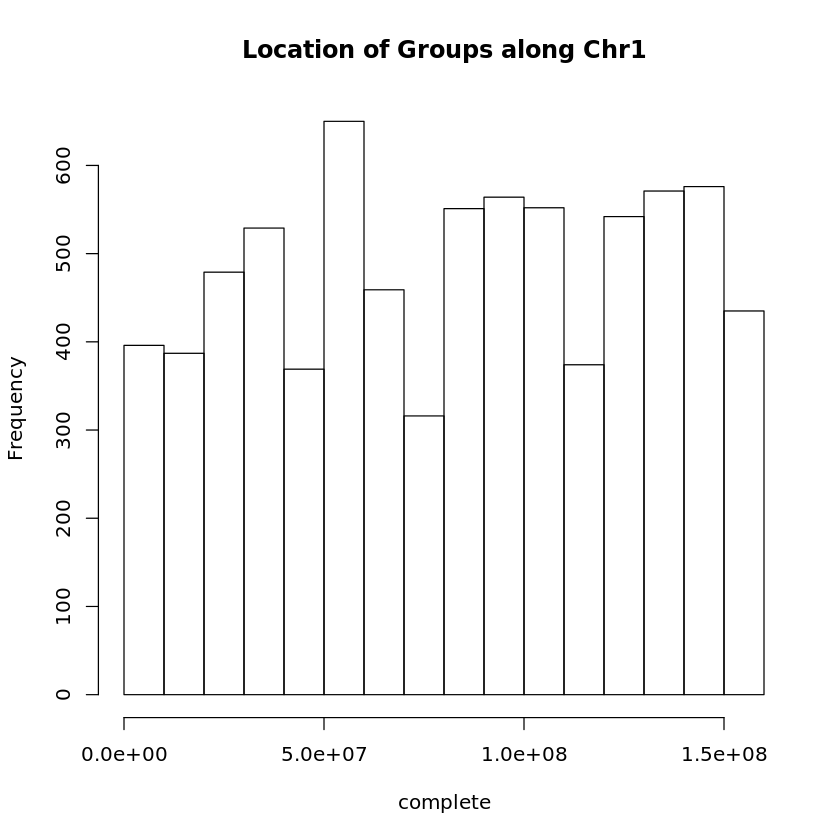

In [13]:
hist(complete, main = "Location of Groups along Chr1")

In [14]:
grouping <- clusterdf[as.numeric(as.character(clusterdf$start)) %in% complete, ]
grouping <- as.data.frame(grouping)
head(grouping,10)

,binID,start,high,medium,low
48616,chr3_3090000,3089900,131,56,16
48617,chr3_3090100,3090000,97,70,13
48732,chr3_3104600,3104500,237,32,10
48734,chr3_3104700,3104600,196,24,15
49240,chr3_3177200,3177100,124,36,10
49242,chr3_3177300,3177200,49,9,0
49243,chr3_3177400,3177300,58,20,3
49332,chr3_3194500,3194400,63,64,32
49333,chr3_3194600,3194500,75,63,19
49381,chr3_3201300,3201200,143,74,9


In [15]:
paste("Total number of bins grouped:", nrow(grouping))

[1] "Total number of bins grouped: 7750"

In [16]:
library(ggplot2)

In [17]:
pre.row <- grouping[1,]

part <- data.frame()
part <- rbind(part, pre.row)

counter = 1
sep.fun <- function(row) {
    if (as.numeric(as.character(row["start"])) - as.numeric(as.character(pre.row["start"])) > 100) {
        part <<- rbind(part, data.frame(binID = c(paste("gap", counter)), 
                                        start = c(0), high = c(100), medium = c(100), low = c(100)))
        counter <<- counter + 1
    }
    part <<- rbind(part, row)
    pre.row <<- row
}

invisible(apply(grouping[-1,], 1, sep.fun))

In [18]:
part[20:60,]

,binID,start,high,medium,low
20,chr3_3257800,3257700,22,0,0
21,chr3_3257900,3257800,18,0,0
110,gap 7,0,100,100,100
23,chr3_3258300,3258200,22,2,0
24,chr3_3258400,3258300,23,5,0
112,gap 8,0,100,100,100
26,chr3_3259200,3259100,106,25,0
27,chr3_3259300,3259200,20,0,0
28,chr3_3259400,3259300,21,3,0
29,chr3_3259500,3259400,64,23,5


In [19]:
head(part)
tail(part)

,binID,start,high,medium,low
48616,chr3_3090000,3089900,131,56,16
2,chr3_3090100,3090000,97,70,13
1,gap 1,0,100,100,100
4,chr3_3104600,3104500,237,32,10
5,chr3_3104700,3104600,196,24,15
11,gap 2,0,100,100,100


,binID,start,high,medium,low
14240,gap 3651,0,100,100,100
113981,chr3_159446100,159446000,238,3,0
113991,chr3_159446200,159446100,131,0,0
14241,gap 3652,0,100,100,100
114011,chr3_159756500,159756400,136,22,3
114021,chr3_159756600,159756500,32,6,0


In [20]:
write.csv(part, "chr3_B_group.csv")

[1] "Total Number of groups: 3653"

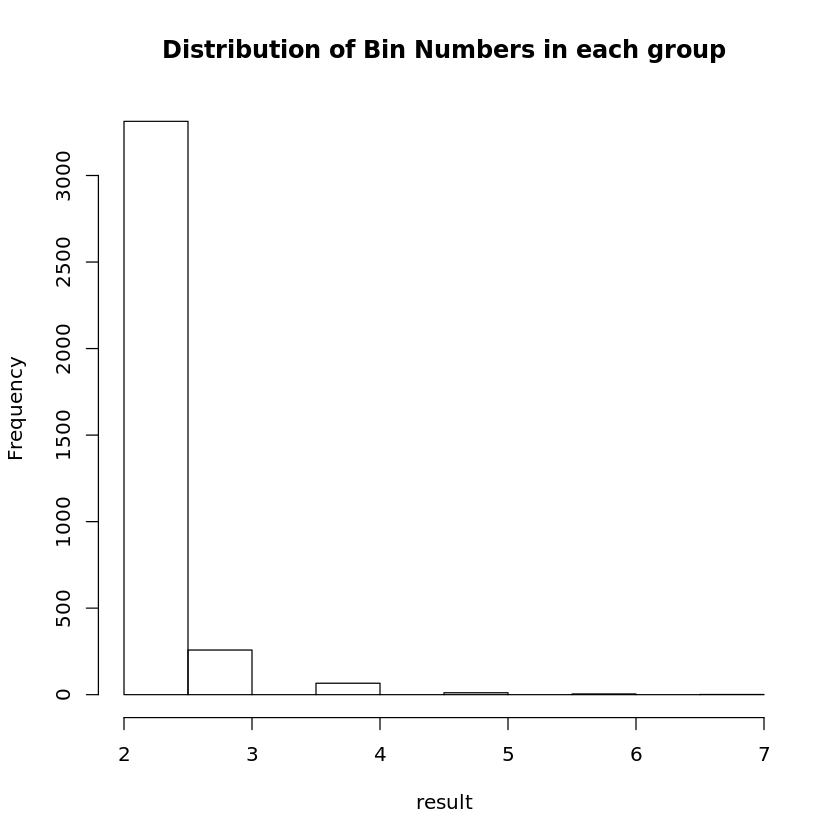

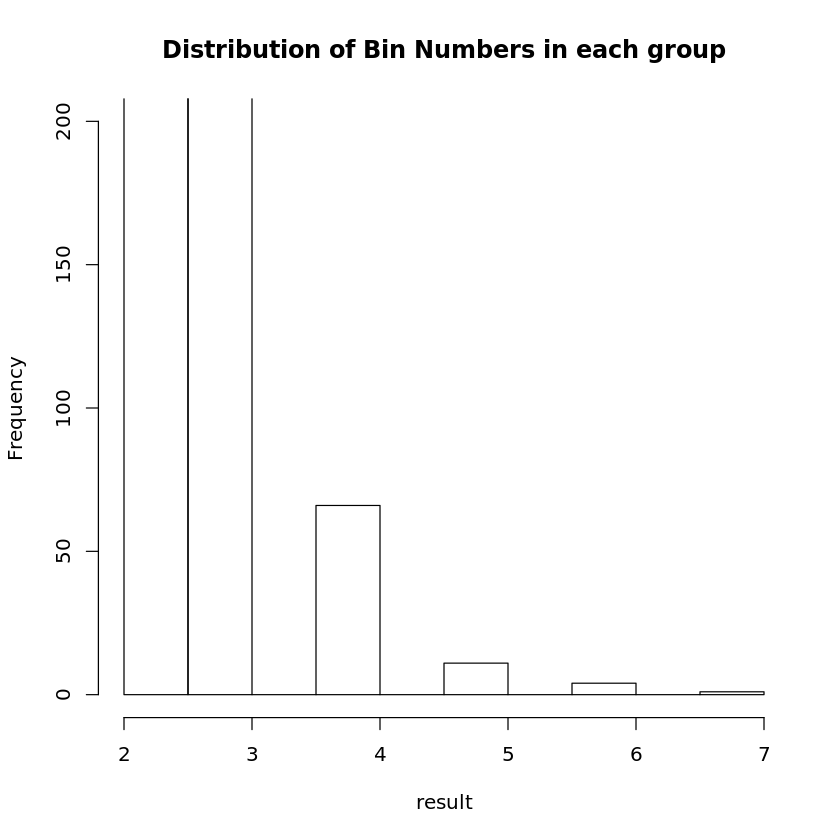

In [21]:
count = 0
result = c()
for (row in 1:nrow(part)) {
    if (substr(as.character(part[row, "binID"]), 1, 3) != "gap") {
        count = count + 1
    } else {
        result = c(result, count)
        count = 0
    }
}

result = c(result, count)

paste("Total Number of groups:", length(result))
hist(result, main = "Distribution of Bin Numbers in each group")
hist(result, ylim = c(0, 200), main = "Distribution of Bin Numbers in each group")

In [22]:
# plotdf <- data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,3])), cata = c(3))
# plotdf <- rbind(plotdf, data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,4])), cata = c(4)))
# plotdf <- rbind(plotdf, data.frame(bin_ID = part[1,1], per = as.numeric(as.character(part[1,5])), cata = c(5)))


# plotdf

In [23]:
# for (i in 2:nrow(part)){
#     if (substr(as.character(part[i,1]),1,3) == "gap"){
#         plotdf <- rbind(plotdf, data.frame(bin_ID = c(as.character(part[i,1])), per = c(100), cata = c(1)))
#     } else {
#         for (j in 3:5){
#             plotdf <- rbind(plotdf, data.frame(bin_ID = c(as.character(part[i,1])), per = c(as.numeric(as.character(part[i,j]))), cata = c(j)))
#         }
#     }
    
# }

# head(plotdf, 10)

In [24]:
# plotdf$cata <- factor(plotdf$cata, levels = c(3,4,5,1), labels = c("high", "medium", "low", "gap"))

# head(plotdf,100)

In [25]:
# plotdf$bin_ID <- factor(plotdf$bin_ID, levels = unique(plotdf$bin_ID))

In [26]:
# plotdf$per <- as.numeric(as.character(plotdf$per))

In [27]:
# names(plotdf) <- c("bin_ID", "count", "cata")

In [28]:
# ggplot(data = plotdf, aes(x = bin_ID, y = count, fill = factor(cata))) + coord_flip() + 
#   geom_bar(stat = "identity", width = 2) + ylim(0, 300) + scale_fill_brewer(palette="Spectral")

In [29]:
# zoomindf <- head(plotdf, 200)
# ggplot(data = zoomindf, aes(x = bin_ID, y = count, fill = factor(cata))) + 
#   geom_bar(stat = "identity") + ylim(0, 500) + scale_fill_brewer(palette="Spectral")